# 🧬 Algoritmo Genético
## 📚 Importação das bibliotecas

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

## 🎯 Função objetivo

In [2]:
def f(x):
    freq = 0.9
    coef = 0.1
    y = 0
    nvar = len(x)
    for i in range(nvar):
        y += np.sin(freq*x[i]) + coef*x[i]*x[i]
    return y

O mínimo está perto de -1.6534698176788387.
O valor da função objetivo no mínimo é aproximandamente -0.7231882492091806.


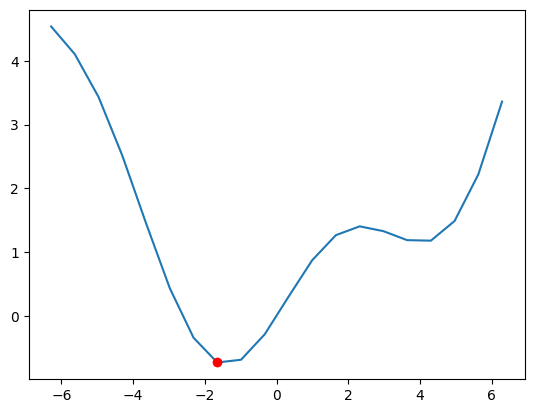

In [3]:
# Esta célula faz o plot da função f em Omega para nvar 1 ou 2.
# Para nvar=3 se desenha pontos em Omega com cores mais escuras onde a f tem valores menores e cores mais claras onde f tem valores maiores.
# Com uma bolinha vermelha se marca o mínimo global de f em Omega
# O mínimo global é mais preciso a medida que a variável npts assume valores maiores.

# número de variáveis
nvar = 1 # experimente valores 1, 2 ou 3

# Omega = [a[0],b[0]]x...x[a[nvar-1],b[nvar-1]]
a = np.zeros(nvar)
b = np.zeros(nvar)
for i in range(nvar):
    a[i] = -2*np.pi
    b[i] =  2*np.pi

# número de pontos no segmento [a[i],b[i]]
npts = 20

if nvar == 1:
    x = np.linspace(a[0], b[0], npts)
    z = np.zeros_like(x)
    for i in range(npts):
        z[i] = f(np.array([x[i]]))
    plt.plot(x, z)
    j = np.argmin(z)
    plt.plot(x[j], z[j], 'or')
    print(f'O mínimo está perto de {x[j]}.')
    print(f'O valor da função objetivo no mínimo é aproximandamente {z[j]}.')

elif nvar == 2:
    x1 = np.arange(a[0],b[0],(b[0]-a[0])/npts)
    x2 = np.arange(a[1],b[1],(b[1]-a[1])/npts)
    X1, X2 = np.meshgrid(x1,x2)
    Z = np.zeros_like(X1)
    for i in range(npts):
        for j in range(npts):
            v = np.array([X1[i,j],X2[i,j]])
            Z[i,j] = f(v)
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(X1, X2, Z)
    i,j = np.unravel_index(Z.argmin(), Z.shape)
    ax.scatter(X1[i,j], X2[i,j], np.array([[Z[i,j]]]), marker='o', color='red')
    ax.view_init(elev=0, azim=20, roll=0)
    print(f'O mínimo está perto de ({X1[i,j]}, {X2[i,j]}).')
    print(f'O valor da função objetivo no mínimo é aproximandamente {Z[i,j]}.')

elif nvar == 3:
    x1 = np.arange(a[0],b[0],(b[0]-a[0])/npts)
    x2 = np.arange(a[1],b[1],(b[1]-a[1])/npts)
    x3 = np.arange(a[2],b[2],(b[2]-a[2])/npts)
    X1, X2, X3 = np.meshgrid(x1, x2, x3)
    Z = np.zeros_like(X1)
    for i in range(npts):
        for j in range(npts):
            for k in range(npts):
                v = np.array([X1[i,j,k], X2[i,j,k], X3[i,j,k]])
                Z[i,j,k] = f(v)
    x1 = X1.ravel()
    x2 = X2.ravel()
    x3 = X3.ravel()
    z  = Z.ravel()
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(x1, x2, x3, c=z, marker='.', cmap='viridis')
    j = np.argmin(z)
    ax.scatter(x1[j], x2[j], x3[j], marker='o', color='red')
    print(f'O mínimo está perto de ({x1[j]}, {x2[j]}, {x3[j]}).')
    print(f'O valor da função objetivo no mínimo é aproximandamente {z[j]}.')
    ax.view_init(elev=0, azim=1, roll=0)

## 🧮 Função de decodificação

In [4]:
def decode(chrom, a, b):
    nvar = len(a)                 # número de variáveis do problema de otimização
    ngen = len(chrom)             # número de bits em um cromossomo
    nbit = ngen//nvar             # número de bits em uma variável

    q = np.array([0.5**(i+1) for i in range(nbit)])
    x = np.zeros(nvar)
    for j in range(nvar):
        w = chrom[j*nbit:(j+1)*nbit]
        x_norm = np.dot(w,q)                # Etapa 1: conversão em número em base 2 para base 10
        x[j] = (b[j]-a[j])*x_norm + a[j]    # Etapa 2: desfaz a normalização
    return x

fitness = lambda x: -f(decode(chrom, a, b))

## 🧫 Funções dos Operadores Genéticos

In [5]:
def gen_pop(popsize, chromsize):
  # Gera a população inicial com popsize cromossomos, cada um com chromsize bits.
  population =[]
  for _ in range(popsize):
    # Gera um vetor de bits aleatórios
    chrom = np.random.randint(0, 2, size = chromsize)
    population.append(chrom)
  return population

In [6]:
def empty_pop():
  return []

In [7]:
def select(population, fitness):
  # Seleciona um cromossomo da população usando torneio.
  c1, c2 = random.sample(population, 2)
  return c1 if fitness(c1) > fitness(c2) else c2

In [8]:
def crossover(parent1, parent2, pcross):
    if len(parent1) != len(parent2):
        raise ValueError("Os cromossomos devem ter o mesmo tamanho para o crossover.")

    # Decide aleatoriamente se o crossover deve ocorrer
    if random.random() < pcross:
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return offspring1, offspring2
    else:
        # Se não ocorrer crossover, retorna os pais como estão
        return np.copy(parent1), np.copy(parent2)

In [9]:
def mutate(chrom, mutation_rate):
    # Cria uma cópia do cromossomo para evitar modificar o original
    mutated_chrom = np.copy(chrom)

    # Itera sobre cada bit do cromossomo
    for i in range(len(mutated_chrom)):
        # Decide aleatoriamente se o bit deve ser mutado
        if random.random() < mutation_rate:
            # Inverte o bit
            mutated_chrom[i] = 1 - mutated_chrom[i]  # Se for 0, torna-se 1 e vice-versa

    return mutated_chrom

In [10]:
def add(chrom, population):
  population.append(chrom)
  return population

## 🏗️ Função princial do Algoritmo Genético

In [11]:
def ga(fitness, pcross, pmut, popsize, chromsize, maxgen):
    pop = gen_pop(popsize, chromsize)
    for _ in range(maxgen):
        newpop = empty_pop()
        for _ in range(popsize):
            c1 = select(pop, fitness)
            c2 = select(pop, fitness)
            c12, c21 = crossover(c1, c2, pcross)
            c121 = mutate(c12, pmut)
            c212 = mutate(c21, pmut)
            newpop = add(c121,newpop)
            newpop = add(c212,newpop)
        pop = newpop
    return pop

## 📐 Definindo valores para minimização da função

In [12]:
# Como queremos minimizar f(x), usamos -f(x) para que a função ga maximize a fitness.
# A função fitness recebe um cromossomo, decodifica ele e retorna -f(x)
nvar = 1  # ou 2, ou 3, conforme o problema
a = -2 * np.pi * np.ones(nvar)
b =  2 * np.pi * np.ones(nvar)
fitness = lambda chrom: -f(decode(chrom, a, b))

# Parâmetros do GA
popsize = 50 # Tamanho da população
nbit = 10 # Bits por variável
chromsize = nvar * nbit
pcross = 0.7 # Probabilidade de crossover
pmut = 0.01 # Probabilidade de mutação para cada bit
maxgen = 100 # Número de gerações

final_pop = ga(fitness, pcross, pmut, popsize, chromsize, maxgen)

## 🎖️ Por fim, encontrando o melhor resultado

In [13]:
# Seleciona o melhor cromossomo da população final
best = final_pop[0]
best_fit = fitness(best)
for chrom in final_pop:
    if fitness(chrom) > best_fit:
        best = chrom
        best_fit = fitness(chrom)

# Decodifica o melhor cromossomo para obter a solução real
best_x = decode(best, a, b)
print("Melhor solução encontrada:", best_x)
print("Valor de f(x) na solução:", f(best_x))

Melhor solução encontrada: [-1.39899048]
Valor de f(x) na solução: -0.7560946568910832
